## Final Project Submission

Please fill out:
* Student name: Yi-Wei Liu
* Student pace: Flex 
* Scheduled project review date/time: Feb 20, 2024 (10:00-10:45)
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@yw.liu93/why-i-decided-to-pivot-to-data-science-088792776fc9

### Final Project Submission

A hypothetical company has decided to create a new movie studio, and would like to explore what types of films are currently doing the best at the box office. In this project, I look at the statistical relationship between various movie attributes - including production budget, genre, month of release, name of director - and worldwide box-office gross. 

### Data Source

This project's data source includes datasets from two websites:
- The Numbers (https://www.the-numbers.com/movie/budgets), which includes the release date, production budget and worldwide gross of 5,782 movies
- IMDB (https://datasets.imdbws.com/), which includes a variety of movie data on over 70,000 movies. The key data we use includes genre and name of director.

The datasets are very comprehensive for our purposes and are generally well-maintained. 

### Business Questions

I will investigate if there is a statistically significant relationship between worldwide gross and three attributes: genre, month of release, and movie run-time. 

1. Genre: Of the three most popular movie genres, are there any genres associated with higher worldwide gross?
2. Month of release: Which months of the year are associated with higher grossing movies?
3. Movie run-time: Is a shorter or longer movie length associated with higher worldwide gross?

### Data Preparation

In the below section, I clean up the data to more efficiently answer the above business questions:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Opening the The Numbers CSV file and getting a sense of the dataset: 

movie_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', low_memory=False)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [2]:
# Next let's open the IMDB SQLite file and query the relevant attributes:

import sqlite3
conn = sqlite3.connect('zippedData/im.db/im.db')

q0 = """
SELECT
    primary_title,
    genres,
    runtime_minutes
FROM
    movie_basics
;
"""

q0_result = pd.read_sql(q0, conn)
q0_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   genres           140736 non-null  object 
 2   runtime_minutes  114405 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.3+ MB


In [3]:
# Now we merge the two datasets to get a list of movies with worldwide gross, genre and run-time data.
# All we need to do is rename IMDB's "primary_title" column to "movie":

q0_result.rename(columns={'primary_title':'movie'}, inplace=True)
merged_df = pd.merge(movie_df, q0_result, on=['movie'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3815 non-null   int64  
 1   release_date       3815 non-null   object 
 2   movie              3815 non-null   object 
 3   production_budget  3815 non-null   object 
 4   domestic_gross     3815 non-null   object 
 5   worldwide_gross    3815 non-null   object 
 6   genres             3743 non-null   object 
 7   runtime_minutes    3328 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 268.2+ KB


In [4]:
# Post-merger, we will drop columns not required for our analysis, and drop all null and duplicate entries:

merged_df = merged_df.drop(['id','production_budget','domestic_gross'], axis=1)
analysis_df = merged_df.dropna()
analysis_df.reset_index(drop=True, inplace=True)
analysis_df.drop_duplicates(subset=['movie'], inplace=True)

analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 3308
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   release_date     2203 non-null   object 
 1   movie            2203 non-null   object 
 2   worldwide_gross  2203 non-null   object 
 3   genres           2203 non-null   object 
 4   runtime_minutes  2203 non-null   float64
dtypes: float64(1), object(4)
memory usage: 103.3+ KB


<ipython-input-4-a0f389a828a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.drop_duplicates(subset=['movie'], inplace=True)


In [5]:
# Now we have 2,203 non-null entries to work with.
# "worldwide_gross" is an object, so we need to convert it to numerical values:

analysis_df['worldwide_gross'] = analysis_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

analysis_df.head()

<ipython-input-5-05dfb04f8ee8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['worldwide_gross'] = analysis_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


,release_date,movie,worldwide_gross,genres,runtime_minutes
0,"Dec 18, 2009",Avatar,2.776345e+09,Horror,93.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1.045664e+09,"Action,Adventure,Fantasy",136.0
2,"Jun 7, 2019",Dark Phoenix,1.497624e+08,"Action,Adventure,Sci-Fi",113.0
3,"May 1, 2015",Avengers: Age of Ultron,1.403014e+09,"Action,Adventure,Sci-Fi",141.0
4,"Apr 27, 2018",Avengers: Infinity War,2.048134e+09,"Action,Adventure,Sci-Fi",149.0


In [6]:
# Next, to better classify each movie's genre(s), we'll separate the "genres" column into 3 columns.
# Note: Avatar's genre and run-time is clearly incorrect, but we won't correct individual rows in this project.

analysis_df['genres_list'] = analysis_df['genres'].str.split(',')

genres_df = pd.DataFrame(analysis_df['genres_list'].tolist()).fillna('').add_prefix('genre_')

analysis_df = pd.concat([analysis_df, genres_df], axis=1)
analysis_df = analysis_df.drop(['genres','genres_list'], axis=1)

analysis_df.head()

<ipython-input-6-18fa89a48378>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['genres_list'] = analysis_df['genres'].str.split(',')


,release_date,movie,worldwide_gross,runtime_minutes,genre_0,genre_1,genre_2
0,"Dec 18, 2009",Avatar,2.776345e+09,93.0,Horror,,
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1.045664e+09,136.0,Action,Adventure,Fantasy
2,"Jun 7, 2019",Dark Phoenix,1.497624e+08,113.0,Action,Adventure,Sci-Fi
3,"May 1, 2015",Avengers: Age of Ultron,1.403014e+09,141.0,Action,Adventure,Sci-Fi
4,"Apr 27, 2018",Avengers: Infinity War,2.048134e+09,149.0,Action,Adventure,Sci-Fi


In [7]:
# To simplify our analysis, we will only look at the three most popular genres. 
# Counting the frequency of genres in each column:

analysis_df['genre_0'].value_counts()

Action         524
Drama          464
Comedy         408
Adventure      196
Biography      148
Documentary    132
Horror         127
Crime          119
Thriller        21
Animation       20
Sci-Fi          11
Family           8
Fantasy          7
Mystery          6
Romance          5
Musical          3
Music            2
War              1
Western          1
Name: genre_0, dtype: int64

In [8]:
analysis_df['genre_1'].value_counts()

Drama          454
               436
Adventure      208
Comedy         139
Crime          136
Romance        127
Thriller       119
Mystery         97
Horror          90
Animation       81
Family          66
Fantasy         59
Documentary     39
Sci-Fi          38
Music           38
Biography       26
History         24
Sport           12
War              7
Western          6
Musical          1
Name: genre_1, dtype: int64

In [9]:
analysis_df['genre_2'].value_counts()

               971
Thriller       233
Drama          178
Romance        130
Sci-Fi         121
Comedy         105
Fantasy         77
Mystery         61
Family          56
Horror          51
Crime           50
History         38
Sport           34
Music           24
War             23
Animation       17
Documentary     13
Musical          9
Western          7
Biography        4
News             1
Name: genre_2, dtype: int64

In [10]:
# The three most popular genres are Drama (1,096), Comedy (652) and Action (524).
# We'll create columns of boolean values indicating whether each movie classifies as one of the above genres:

def drama_conditions(s):
    if (s['genre_0'] == "Drama") or (s['genre_1'] == "Drama") or (s['genre_2'] == "Drama"):
        return 1
    else:
        return 0
        
def comedy_conditions(s):
    if (s['genre_0'] == "Comedy") or (s['genre_1'] == "Comedy") or (s['genre_2'] == "Comedy"):
        return 1
    else:
        return 0
    
def action_conditions(s):
    if (s['genre_0'] == "Action") or (s['genre_1'] == "Action") or (s['genre_2'] == "Action"):
        return 1
    else:
        return 0

analysis_df['drama_genre'] = analysis_df.apply(drama_conditions, axis=1)
analysis_df['comedy_genre'] = analysis_df.apply(comedy_conditions, axis=1)
analysis_df['action_genre'] = analysis_df.apply(action_conditions, axis=1)
analysis_df = analysis_df.drop(['genre_0','genre_1','genre_2'], axis=1)
analysis_df = analysis_df.dropna()
analysis_df.head()

,release_date,movie,worldwide_gross,runtime_minutes,drama_genre,comedy_genre,action_genre
0,"Dec 18, 2009",Avatar,2.776345e+09,93.0,0,0,0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1.045664e+09,136.0,0,0,1
2,"Jun 7, 2019",Dark Phoenix,1.497624e+08,113.0,0,0,1
3,"May 1, 2015",Avengers: Age of Ultron,1.403014e+09,141.0,0,0,1
4,"Apr 27, 2018",Avengers: Infinity War,2.048134e+09,149.0,0,0,1


In [11]:
# Next, we need to extract the month of release from the "release_date" column:
analysis_df['release_month'] = analysis_df['release_date'].str[0:3]

analysis_df['release_month'].value_counts()

Dec    268
Oct    218
Sep    192
Apr    191
Mar    187
Aug    182
Nov    182
Jul    170
Jun    170
Feb    155
May    147
Jan    141
Name: release_month, dtype: int64

In [12]:
# The months of release look decently distributed, with a spike during the December holiday season.
# Similar to how we treated genres, we add columns of boolean values, indicating if the movie was released in that month:

def dec_condition(s):
    if (s['release_month'] == "Dec"):
        return 1
    else:
        return 0
    
def oct_condition(s):
    if (s['release_month'] == "Oct"):
        return 1
    else:
        return 0
    
def sep_condition(s):
    if (s['release_month'] == "Sep"):
        return 1
    else:
        return 0
    
def apr_condition(s):
    if (s['release_month'] == "Apr"):
        return 1
    else:
        return 0
    
def mar_condition(s):
    if (s['release_month'] == "Mar"):
        return 1
    else:
        return 0
    
def nov_condition(s):
    if (s['release_month'] == "Nov"):
        return 1
    else:
        return 0
    
def aug_condition(s):
    if (s['release_month'] == "Aug"):
        return 1
    else:
        return 0
    
def jul_condition(s):
    if (s['release_month'] == "Jul"):
        return 1
    else:
        return 0
    
def jun_condition(s):
    if (s['release_month'] == "Jun"):
        return 1
    else:
        return 0
    
def feb_condition(s):
    if (s['release_month'] == "Feb"):
        return 1
    else:
        return 0
    
def may_condition(s):
    if (s['release_month'] == "May"):
        return 1
    else:
        return 0
        
def jan_condition(s):
    if (s['release_month'] == "Jan"):
        return 1
    else:
        return 0
    
analysis_df['dec_release'] = analysis_df.apply(dec_condition, axis=1)
analysis_df['oct_release'] = analysis_df.apply(oct_condition, axis=1)
analysis_df['sep_release'] = analysis_df.apply(sep_condition, axis=1)
analysis_df['apr_release'] = analysis_df.apply(apr_condition, axis=1)
analysis_df['mar_release'] = analysis_df.apply(mar_condition, axis=1)
analysis_df['nov_release'] = analysis_df.apply(nov_condition, axis=1)
analysis_df['aug_release'] = analysis_df.apply(aug_condition, axis=1)
analysis_df['jul_release'] = analysis_df.apply(jul_condition, axis=1)
analysis_df['jun_release'] = analysis_df.apply(jun_condition, axis=1)
analysis_df['feb_release'] = analysis_df.apply(feb_condition, axis=1)
analysis_df['may_release'] = analysis_df.apply(may_condition, axis=1)
analysis_df['jan_release'] = analysis_df.apply(jan_condition, axis=1)

analysis_df = analysis_df.drop(['release_month', 'release_date'], axis=1)
analysis_df = analysis_df.dropna()
analysis_df.head()

,movie,worldwide_gross,runtime_minutes,drama_genre,comedy_genre,action_genre,dec_release,oct_release,sep_release,apr_release,mar_release,nov_release,aug_release,jul_release,jun_release,feb_release,may_release,jan_release
0,Avatar,2.776345e+09,93.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,136.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Dark Phoenix,1.497624e+08,113.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,Avengers: Age of Ultron,1.403014e+09,141.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Avengers: Infinity War,2.048134e+09,149.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
# Finally, we can eliminate a few "nonsense" entries for which the worldwide gross and run-time was zero:

analysis_df = analysis_df[analysis_df['worldwide_gross'] > 0]
analysis_df = analysis_df[analysis_df['runtime_minutes'] > 0]

In [14]:
# After the above data cleanup, we have 1,999 non-null entries to work with. 

analysis_df.describe()

,worldwide_gross,runtime_minutes,drama_genre,comedy_genre,action_genre,dec_release,oct_release,sep_release,apr_release,mar_release,nov_release,aug_release,jul_release,jun_release,feb_release,may_release,jan_release
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.227003e+08,102.675838,0.360180,0.211106,0.171086,0.102051,0.101051,0.089045,0.091046,0.085043,0.085543,0.083042,0.078539,0.080540,0.070035,0.069035,0.065033
std,2.232100e+08,22.408416,0.480173,0.408195,0.376678,0.302791,0.301471,0.284879,0.287746,0.279015,0.279758,0.276014,0.269086,0.272196,0.255270,0.253576,0.246645
min,2.600000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.275209e+06,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.104258e+07,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.274725e+08,115.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.776345e+09,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


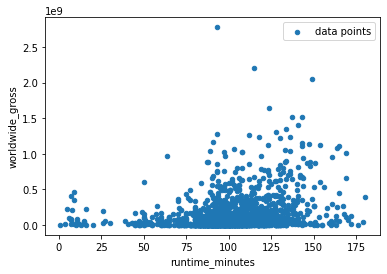

In [16]:
# Before we run the regression, we can graph a scatterplot between worldwide gross and movie run-time

analysis_df.plot(kind='scatter', x='runtime_minutes', y='worldwide_gross', label='data points')
plt.show()

# At first glance, higher-grossing movies do tend to have longer run-times, but the trend is not obvious. 
# Let's run the regression to confirm! 

### Regression Analysis

With the data cleaned up, we can do a multivariate regression to observe the statistical relationships between worldwide gross and run-time, genre and month of release:

In [18]:
# Now let's regress worldwide gross against run-time, genre types, and months of release.
# Below are the results summary:

import statsmodels.api as sm

X = analysis_df[['runtime_minutes','drama_genre','comedy_genre','action_genre','dec_release',
                 'oct_release','sep_release','apr_release','mar_release','nov_release','aug_release',
                 'jul_release','jun_release','feb_release','may_release','jan_release']]
y = analysis_df[['worldwide_gross']]

model = sm.OLS(endog=y, exog=sm.add_constant(X))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     27.24
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.72e-70
Time:                        15:02:47   Log-Likelihood:                -41077.
No. Observations:                1999   AIC:                         8.219e+04
Df Residuals:                    1983   BIC:                         8.228e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.601e+07      2e+07     

In [19]:
# First off, we have a multicollinearity issue, because we included all 12 months of the year as category variables
# To fix this, we need to remove a few months. We can pick those with low statistical significance, i.e. high p-values. 
# So in the next regression, we remove the Dec, Mar, Feb, Nov and Apr category variables with p > 0.05.

# We also remove the Drama category variable, as it is clearly not statistically significant (p = 0.869)

import statsmodels.api as sm

X = analysis_df[['runtime_minutes','comedy_genre','action_genre',
                 'oct_release','sep_release','aug_release',
                 'jul_release','jun_release','may_release','jan_release']]
y = analysis_df[['worldwide_gross']]

model = sm.OLS(endog=y, exog=sm.add_constant(X))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     39.99
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.47e-72
Time:                        15:05:20   Log-Likelihood:                -41081.
No. Observations:                1999   AIC:                         8.218e+04
Df Residuals:                    1988   BIC:                         8.225e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.064e+08   2.24e+07     

#### Interpretation of the Variable Coefficients

All of the above co-efficients are statistically significant at the 5% level (p < 0.05)

Run-time: Every additional minute of run-time is associated with 1,910,000 incremental worldwide gross. This does make some intuitive sense: many of the top-grossing superhero and epic drama movies tend to be over 2 hours long. However, the relationship is unlikely to be linear.

Genres: If the movie is a comedy, it will make an additional 41,750,000 in worldwide gross compared to a non-comedy and non-action movie with the same run-time and month of release. If the movie is an action movie, it will make an additional 159,700,000 compared to an equivalent non-action, non-comedy movie.

Release month: The "control months" are those not included in the regression, i.e. February, March, April, November and December. If the movie is released in October, it will make 49,630,000 less in worldwide gross compared to the equivalent movie in a control month. The same kind of interpretation is applicable to movies released in September (43,230,000 less), August (35,710,000 less), July (35,320,000 more), June (63,250,000 more), May (56,520,000 more) and January (48,070,000 less) 

In summary, based on the results of this regression, to make a higher-grossing movie we want to: 1) increase the run-time; 2) make it an action movie; 3) release it in June.

#### Evaluating the Quality of the Regression

In [32]:


fig, ax = plt.subplots()

ax.scatter(y, results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     39.99
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           2.47e-72
Time:                        10:38:18   Log-Likelihood:                -41081.
No. Observations:                1999   AIC:                         8.218e+04
Df Residuals:                    1988   BIC:                         8.225e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.064e+08   2.24e+07     

In [34]:
analysis_df['log_gross'] = np.log(analysis_df['worldwide_gross'])
analysis_df.head()

,release_date,movie,worldwide_gross,runtime_minutes,drama_genre,comedy_genre,action_genre,dec_release,oct_release,sep_release,apr_release,mar_release,nov_release,aug_release,jul_release,jun_release,feb_release,may_release,jan_release,log_gross
0,"Dec 18, 2009",Avatar,2.776345e+09,93.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21.744401
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1.045664e+09,136.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,20.767918
2,"Jun 7, 2019",Dark Phoenix,1.497624e+08,113.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,18.824560
3,"May 1, 2015",Avengers: Age of Ultron,1.403014e+09,141.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,21.061889
4,"Apr 27, 2018",Avengers: Infinity War,2.048134e+09,149.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,21.440195


In [39]:
import statsmodels.api as sm

X = analysis_df[['runtime_minutes','comedy_genre','action_genre',
                 'oct_release','sep_release','aug_release',
                 'jul_release','jun_release','may_release','jan_release']]
y = analysis_df[['log_gross']]

log_model = sm.OLS(endog=y, exog=sm.add_constant(X))

log_results = log_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_gross   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     37.47
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           7.51e-68
Time:                        10:40:12   Log-Likelihood:                -4624.5
No. Observations:                1999   AIC:                             9271.
Df Residuals:                    1988   BIC:                             9333.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.1920      0.269     

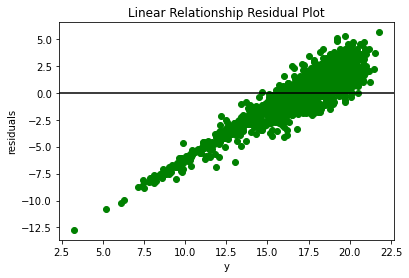

In [40]:
fig, ax = plt.subplots()

ax.scatter(y, log_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### Business Recommendations and Data Visualization

1. [Show runtime_minutes regression line against worldwide gross]

2. [Show average and st.dev of worldwide gross for action and comedy vs. all other genres]

3. [Show average and st.dev of May, June and July vs. all others months]

[explicitly related findings to business needs]
[add labels and titles to visualizations]

In [ ]:
new_df.corr()

In [ ]:
import statsmodels.api as sm

X = new_df[['runtime_minutes','averagerating','adventure_genre']]
y = new_df[['profit_margin']]

model2 = sm.OLS(endog=y, exog=sm.add_constant(X))

results2 = model2.fit()

print(results2.summary())